# ***Exploratory Data Analysis (EDA) on Video Game Sales Dataset***

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


# ***Data cleaning***


In [44]:
df=pd.read_csv('vgchartz-2024.csv')
df.shape

(64016, 14)

In [45]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


DATA CLEANING


In [46]:
#deleting unwanted column
df.drop(columns=['img'],inplace=True)

In [47]:
df.columns

Index(['title', 'console', 'genre', 'publisher', 'developer', 'critic_score',
       'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',
       'release_date', 'last_update'],
      dtype='object')

In [48]:
#checking null values
df.isnull().sum()

,0
title,0
console,0
genre,0
publisher,0
developer,17
critic_score,57338
total_sales,45094
na_sales,51379
jp_sales,57290
pal_sales,51192


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  6678 non-null   float64
 6   total_sales   18922 non-null  float64
 7   na_sales      12637 non-null  float64
 8   jp_sales      6726 non-null   float64
 9   pal_sales     12824 non-null  float64
 10  other_sales   15128 non-null  float64
 11  release_date  56965 non-null  object 
 12  last_update   17879 non-null  object 
dtypes: float64(6), object(7)
memory usage: 6.3+ MB


HANDLING NULL VALUES FROM NUMERIC DATATYPE

In [50]:
num_cols=df.select_dtypes(include=np.number).columns.tolist()
#df.select_dtypes(include=np.number): Selects all columns in the DataFrame df that are of a numeric type (either integers or floats).
#.columns: Extracts the column names of the selected columns.
#.tolist(): Converts the column names into a Python list.

In [51]:
num_cols

['critic_score',
 'total_sales',
 'na_sales',
 'jp_sales',
 'pal_sales',
 'other_sales']

In [52]:
#Filling NaN values of num_cols list by Means of each Columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())


In [53]:
df.isnull().sum()

,0
title,0
console,0
genre,0
publisher,0
developer,17
critic_score,0
total_sales,0
na_sales,0
jp_sales,0
pal_sales,0


HANDELING THE MISSING VALUES FROM DATETIME COLUMN


In [54]:
#converting the datatype of release_date and last_update coloumn
df['release_date']=pd.to_datetime(df['release_date'])
df['last_update']=pd.to_datetime(df['last_update'])
#pd.to_datetime is used to convert the datetime of columns into the proper datetime format to  be used in calculations

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         64016 non-null  object        
 1   console       64016 non-null  object        
 2   genre         64016 non-null  object        
 3   publisher     64016 non-null  object        
 4   developer     63999 non-null  object        
 5   critic_score  64016 non-null  float64       
 6   total_sales   64016 non-null  float64       
 7   na_sales      64016 non-null  float64       
 8   jp_sales      64016 non-null  float64       
 9   pal_sales     64016 non-null  float64       
 10  other_sales   64016 non-null  float64       
 11  release_date  56965 non-null  datetime64[ns]
 12  last_update   17879 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(6), object(5)
memory usage: 6.3+ MB


In [56]:
date_columns = ['last_update', 'release_date']

for col in date_columns:
    df[col] = df[col].fillna(df[col].median())

In [57]:
df.isnull().sum()

,0
title,0
console,0
genre,0
publisher,0
developer,17
critic_score,0
total_sales,0
na_sales,0
jp_sales,0
pal_sales,0


**HANDING MISSING AND ERROR VALUES FROM OBJECT COLUMNS**

In [58]:
df.dropna(inplace=True)# as less value left so we directly used the dropna function

In [59]:
df.isnull().sum()

,0
title,0
console,0
genre,0
publisher,0
developer,0
critic_score,0
total_sales,0
na_sales,0
jp_sales,0
pal_sales,0


In [60]:
df['publisher'] = df['publisher'].replace('Unknown', np.nan)
df = df.dropna(subset=['publisher'])

#EDA ( **Exploratry Data Analysis** )

1.Which title sold the most

In [61]:
sales_by_title=df.groupby('title')['total_sales'].sum().reset_index()

In [62]:
sales_by_title_sort = sales_by_title.sort_values(by='total_sales',ascending=False)

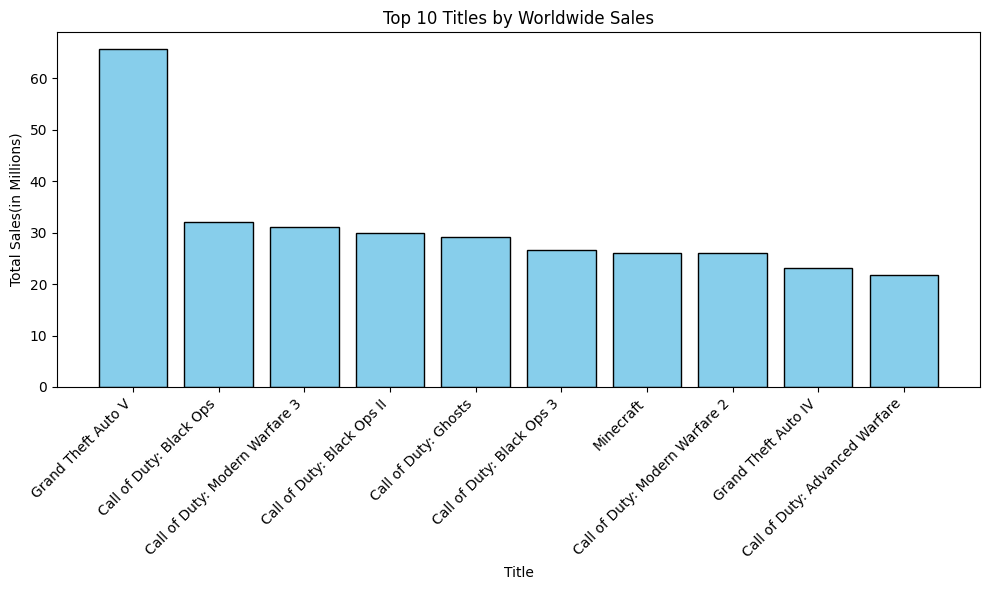

In [63]:
top_10_titles = sales_by_title_sort.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_titles['title'], top_10_titles['total_sales'], color='skyblue', edgecolor='black')
plt.title('Top 10 Titles by Worldwide Sales')
plt.xlabel('Title')
plt.ylabel('Total Sales(in Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Q2.Which year had the highest sales? Has the industry grown over time?

In [64]:
df['release_year']=(df['release_date']).dt.year #adding new col "release year"
# .dt.year extract the year from datetime value

In [65]:
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.40000,20.32,6.37,0.99,9.85,3.12,2013-09-17,2019-04-21,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70000,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60000,16.15,8.41,0.47,5.49,1.78,2002-10-28,2019-04-21,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,7.22044,15.86,9.06,0.06,5.33,1.42,2013-09-17,2019-04-21,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10000,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,2015


In [66]:
sales_by_year=df.groupby('release_year')['total_sales'].sum().reset_index()
sales_by_year_sort=sales_by_year.sort_values(by='total_sales',ascending=False)


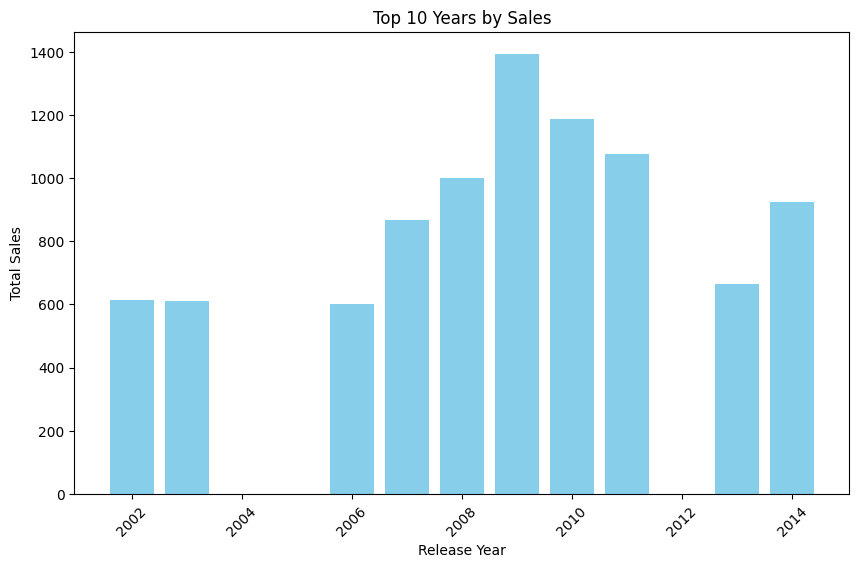

In [67]:
top_10_sales = sales_by_year_sort.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_sales['release_year'], top_10_sales['total_sales'], color='skyblue')
plt.title('Top 10 Years by Sales')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

[link text](https://)**Conclusion 1** :- Year 2009 has most Number Of Sales

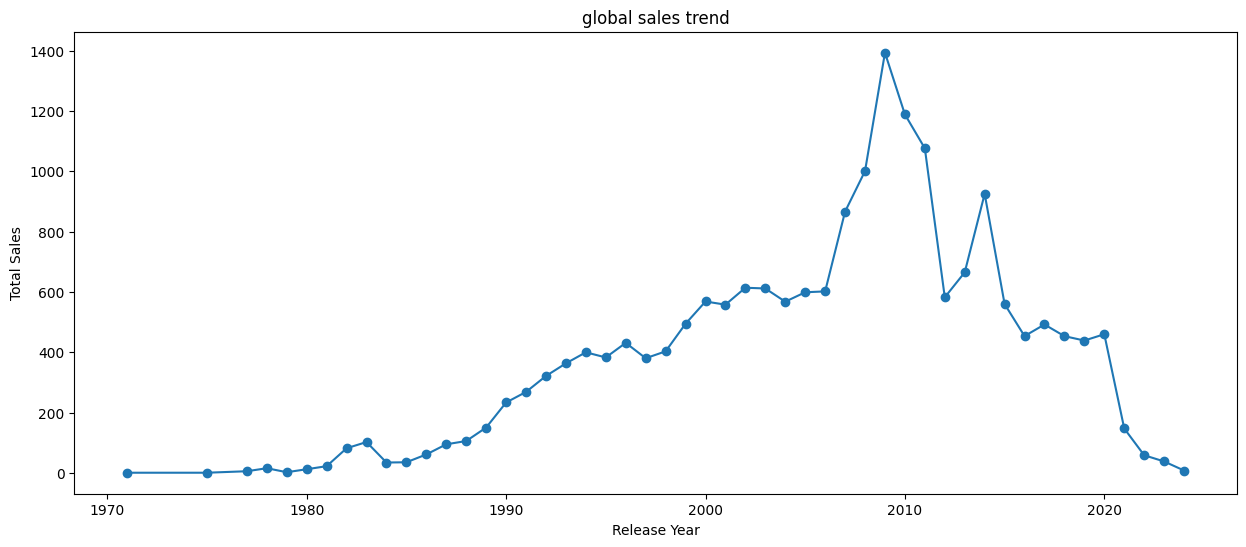

In [68]:
#q 2.2
plt.figure(figsize=(15,6))
plt.plot(sales_by_year['release_year'],sales_by_year['total_sales'],marker='o',linestyle='-')
plt.title('global sales trend')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.show()


**Conclusion 2** :-The industry grown around the year 2008 but currently the progress is constant

3.Do any consoles seem to specialize in a particular genre?


In [69]:
console_genre_sales=df.groupby(['console','genre'])['total_sales'].sum().reset_index()
console_genre_sales_sort=console_genre_sales.sort_values(by='total_sales',ascending=False)
print(console_genre_sales_sort)

    console         genre  total_sales
427      PC     Adventure   426.812546
443      PC      Strategy   407.067729
432      PC          Misc   348.243082
497     PS2        Sports   318.746901
438      PC  Role-Playing   301.230617
..      ...           ...          ...
41      3DS  Visual Novel     0.090000
27      3DS     Education     0.090000
507     PS3         Party     0.040000
742    X360    Board Game     0.020000
174      DS  Visual Novel     0.020000

[835 rows x 3 columns]


In [70]:
px.sunburst(console_genre_sales_sort,path=['console','genre'],values='total_sales')
#as matplotlib dont support sunburst so need to import ploty

**Conclusion** :- Pc console have the highest sale in adventure genre


4.What titles are popular in one region but flop in another region

In [71]:
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.40000,20.32,6.37,0.99,9.85,3.12,2013-09-17,2019-04-21,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70000,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60000,16.15,8.41,0.47,5.49,1.78,2002-10-28,2019-04-21,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,7.22044,15.86,9.06,0.06,5.33,1.42,2013-09-17,2019-04-21,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10000,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,2015


na=north america
jp=Japan
PAL=phase alternating line(includes region like europe ,australiye ,new zeland and some other countries)

In [72]:
#adding new col to find ratio of each country sale
df['na_ratio']=df['na_sales']/df['total_sales']
df['jp_ratio']=df['jp_sales']/df['total_sales']
df['pal_ratio']=df['pal_sales']/df['total_sales']

In [73]:
df.head(3)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year,na_ratio,jp_ratio,pal_ratio
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,2019-04-21,2013,0.313484,0.048720,0.484744
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,2014,0.312532,0.030944,0.500774
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,2019-04-21,2002,0.520743,0.029102,0.339938


**4.1** Titles that are popular in NA but flopping in JAPAN And PAl regions

In [74]:
na_popular=df[(df.na_ratio>0.8)&(df.jp_ratio<0.2)&(df.pal_ratio<0.2)]

In [75]:
na_popular
#shows the popularity of titals in na region and flop in jp and pal region

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year,na_ratio,jp_ratio,pal_ratio
75,Madden NFL 2004,PS2,Sports,EA Sports,EA Tiburon,9.50000,5.23,4.26000,0.010000,0.26,0.71,2003-08-12,2019-04-21,2003,0.814532,0.001912,0.049713
94,Madden NFL 06,PS2,Sports,EA Sports,EA Tiburon,9.10000,4.91,3.98000,0.010000,0.26,0.66,2005-08-08,2019-04-21,2005,0.810591,0.002037,0.052953
114,Madden NFL 2005,PS2,Sports,EA Sports,EA Tiburon,9.50000,4.53,4.18000,0.010000,0.26,0.08,2004-08-09,2019-04-21,2004,0.922737,0.002208,0.057395
125,Asteroids,2600,Shooter,Atari,Atari,7.22044,4.31,4.00000,0.102281,0.26,0.05,1981-01-01,2019-04-21,1981,0.928074,0.023731,0.060325
135,Teenage Mutant Ninja Turtles,NES,Platform,Ultra Games,Konami,5.90000,4.17,3.38000,0.310000,0.44,0.04,1989-06-01,2019-04-21,1989,0.810552,0.074341,0.105516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,New International Track & Field,DS,Sports,Konami,Sumo Digital,7.40000,0.08,0.07000,0.000000,0.00,0.01,2008-07-22,2019-04-21,2008,0.875000,0.000000,0.000000
11154,Baroque,Wii,Role-Playing,Atlus,Sting,5.20000,0.08,0.07000,0.000000,0.00,0.01,2008-04-08,2019-04-21,2008,0.875000,0.000000,0.000000
11242,Elebits: The Adventures of Kai and Zero,DS,Adventure,Konami,Konami,7.50000,0.08,0.07000,0.000000,0.00,0.01,2009-01-06,2019-04-21,2009,0.875000,0.000000,0.000000
12114,Vampire Rain: Altered Species,PS3,Action,Ignition Entertainment,Artoon,3.50000,0.06,0.05000,0.000000,0.00,0.01,2008-09-02,2019-04-21,2008,0.833333,0.000000,0.000000



**Conclusion 4.1** :-the titles 'madden NFL 2204','Madden NFL 06' and 'Madden 2005' are popular in north america but flop in JP and PAL region

In [76]:
na_popular=df[(df.na_ratio>0.8)&(df.jp_ratio<0.2)&(df.pal_ratio<0.2)]
na_popular
#shows the popularity of titals in na region and flop in jp and pal region

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year,na_ratio,jp_ratio,pal_ratio
75,Madden NFL 2004,PS2,Sports,EA Sports,EA Tiburon,9.50000,5.23,4.26000,0.010000,0.26,0.71,2003-08-12,2019-04-21,2003,0.814532,0.001912,0.049713
94,Madden NFL 06,PS2,Sports,EA Sports,EA Tiburon,9.10000,4.91,3.98000,0.010000,0.26,0.66,2005-08-08,2019-04-21,2005,0.810591,0.002037,0.052953
114,Madden NFL 2005,PS2,Sports,EA Sports,EA Tiburon,9.50000,4.53,4.18000,0.010000,0.26,0.08,2004-08-09,2019-04-21,2004,0.922737,0.002208,0.057395
125,Asteroids,2600,Shooter,Atari,Atari,7.22044,4.31,4.00000,0.102281,0.26,0.05,1981-01-01,2019-04-21,1981,0.928074,0.023731,0.060325
135,Teenage Mutant Ninja Turtles,NES,Platform,Ultra Games,Konami,5.90000,4.17,3.38000,0.310000,0.44,0.04,1989-06-01,2019-04-21,1989,0.810552,0.074341,0.105516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,New International Track & Field,DS,Sports,Konami,Sumo Digital,7.40000,0.08,0.07000,0.000000,0.00,0.01,2008-07-22,2019-04-21,2008,0.875000,0.000000,0.000000
11154,Baroque,Wii,Role-Playing,Atlus,Sting,5.20000,0.08,0.07000,0.000000,0.00,0.01,2008-04-08,2019-04-21,2008,0.875000,0.000000,0.000000
11242,Elebits: The Adventures of Kai and Zero,DS,Adventure,Konami,Konami,7.50000,0.08,0.07000,0.000000,0.00,0.01,2009-01-06,2019-04-21,2009,0.875000,0.000000,0.000000
12114,Vampire Rain: Altered Species,PS3,Action,Ignition Entertainment,Artoon,3.50000,0.06,0.05000,0.000000,0.00,0.01,2008-09-02,2019-04-21,2008,0.833333,0.000000,0.000000


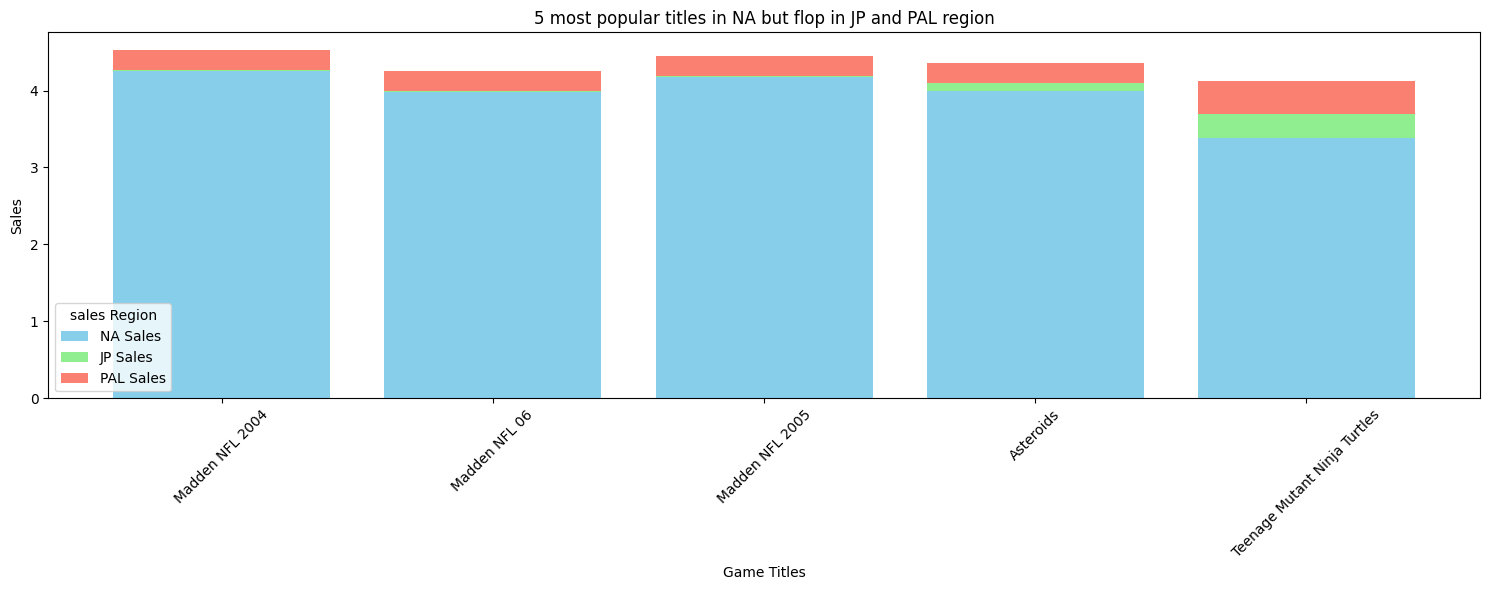

In [77]:
top_5 = na_popular.head(5)
plt.figure(figsize=(15, 6))
#stacked bar chart
plt.bar(top_5['title'], top_5['na_sales'], label='NA Sales', color='skyblue')
plt.bar(top_5['title'], top_5['jp_sales'], bottom=top_5['na_sales'], label='JP Sales', color='lightgreen')
plt.bar(top_5['title'], top_5['pal_sales'], bottom=top_5['na_sales'] + top_5['jp_sales'], label='PAL Sales', color='salmon')
plt.title('5 most popular titles in NA but flop in JP and PAL region')
plt.xlabel('Game Titles')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='sales Region')
plt.tight_layout()
plt.show()


4.2 : Titles that are popular in japan but not in na and pal

In [78]:
jp_popular=df[(df.jp_ratio>0.8)&(df.na_ratio<0.2)&(df.pal_ratio<0.2)]

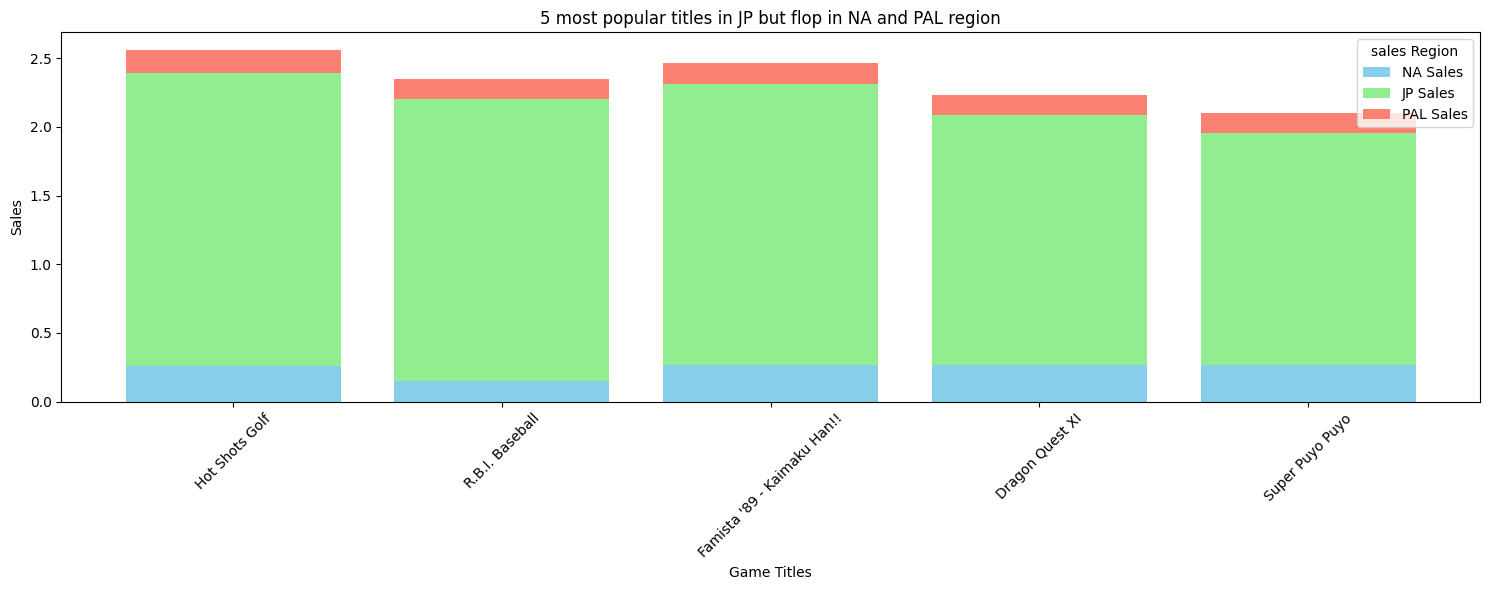

In [79]:
top_5_jp = jp_popular.head(5)
plt.figure(figsize=(15, 6))
plt.bar(top_5_jp['title'], top_5_jp['na_sales'], label='NA Sales', color='skyblue')
plt.bar(top_5_jp['title'], top_5_jp['jp_sales'], bottom=top_5_jp['na_sales'], label='JP Sales', color='lightgreen')
plt.bar(top_5_jp['title'], top_5_jp['pal_sales'], bottom=top_5_jp['na_sales'] + top_5_jp['jp_sales'], label='PAL Sales', color='salmon')
plt.title('5 most popular titles in JP but flop in NA and PAL region')
plt.xlabel('Game Titles')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='sales Region')
plt.tight_layout()
plt.show()


**Conclusion** 4.2 :- the titles 'hot shots golf','RBI Baseball' and others are popular in japan but not in other 2

4.3: titles that are popular in pal region but not in japan and NA

In [80]:
pal_popular=df[(df.pal_ratio>0.8)&(df.na_ratio<0.2)&(df.jp_ratio<0.2)]
pal_popular.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year,na_ratio,jp_ratio,pal_ratio
34,The Sims 3,PC,Simulation,Electronic Arts,EA Redwood Shores,8.50000,7.96,1.01000,0.102281,6.46,0.50,2009-06-02,2019-04-21,2009,0.126884,0.012849,0.811558
280,Colin McRae Rally,PS,Racing,Sony Computer Entertainment,Codemasters,7.90000,2.87,0.09000,0.120000,2.43,0.22,2000-01-31,2019-04-21,2000,0.031359,0.041812,0.846690
918,Anno 2070,PC,Strategy,Ubisoft,Blue Byte Studio,8.70000,1.40,0.26474,0.102281,1.14,0.26,2011-11-17,2019-04-21,2011,0.189100,0.073058,0.814286
1007,TOCA 2 Touring Car Championship,PS,Racing,Codemasters,Codemasters,7.22044,1.32,0.03000,0.020000,1.16,0.11,1999-10-31,2019-04-21,1999,0.022727,0.015152,0.878788
1077,Brian Lara Cricket,PS,Sports,Codemasters,Codemasters,7.22044,1.26,0.02000,0.010000,1.13,0.10,1998-12-01,2019-04-21,1998,0.015873,0.007937,0.896825


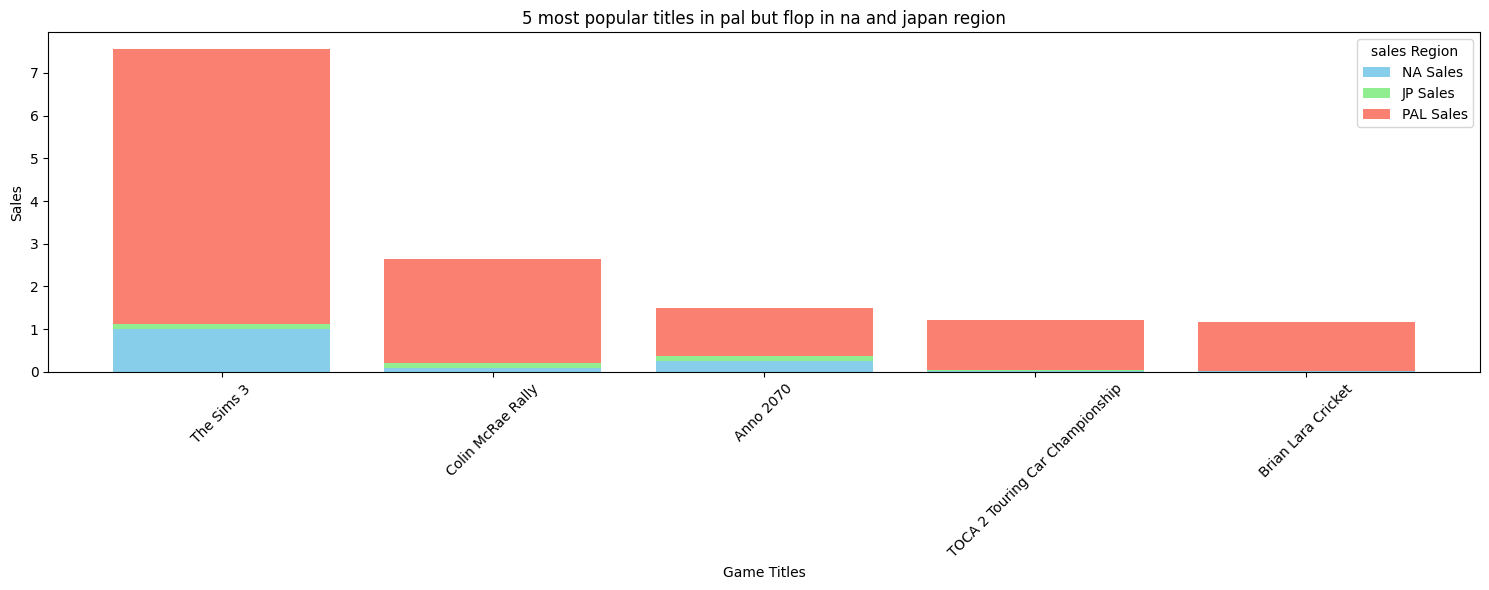

In [81]:
top_5_pal = pal_popular.head(5)
plt.figure(figsize=(15, 6))
plt.bar(top_5_pal['title'], top_5_pal['na_sales'], label='NA Sales', color='skyblue')
plt.bar(top_5_pal['title'], top_5_pal['jp_sales'], bottom=top_5_pal['na_sales'], label='JP Sales', color='lightgreen')
plt.bar(top_5_pal['title'], top_5_pal['pal_sales'], bottom=top_5_pal['na_sales'] + top_5_pal['jp_sales'], label='PAL Sales', color='salmon')
plt.title('5 most popular titles in pal but flop in na and japan region')
plt.xlabel('Game Titles')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='sales Region')
plt.tight_layout()
plt.show()

**conclusion** 4.3:- the titles "the sims 3","colin mcrae rally","anno 2070" are popular in pal but not in other two

Q5 :  Which publishers have the highest total sales across all games?

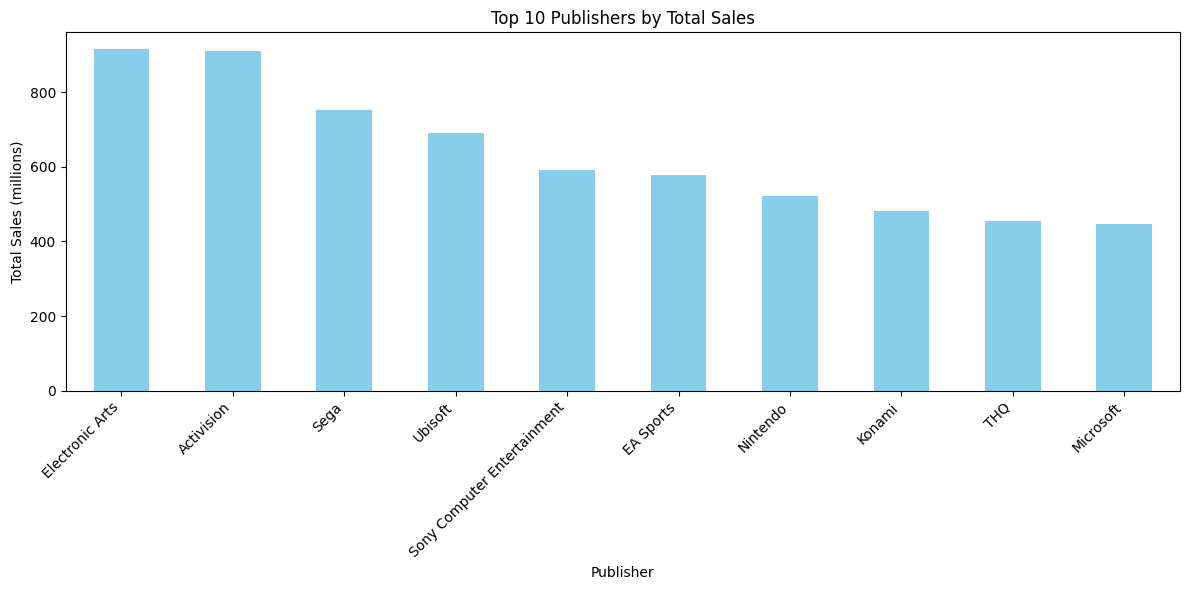

In [82]:
# Group data by publisher and sum total sales
top_publishers = df.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 publishers by total sales
plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers by Total Sales')
plt.xlabel('Publisher')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Q6: Genre Evolution Over Time

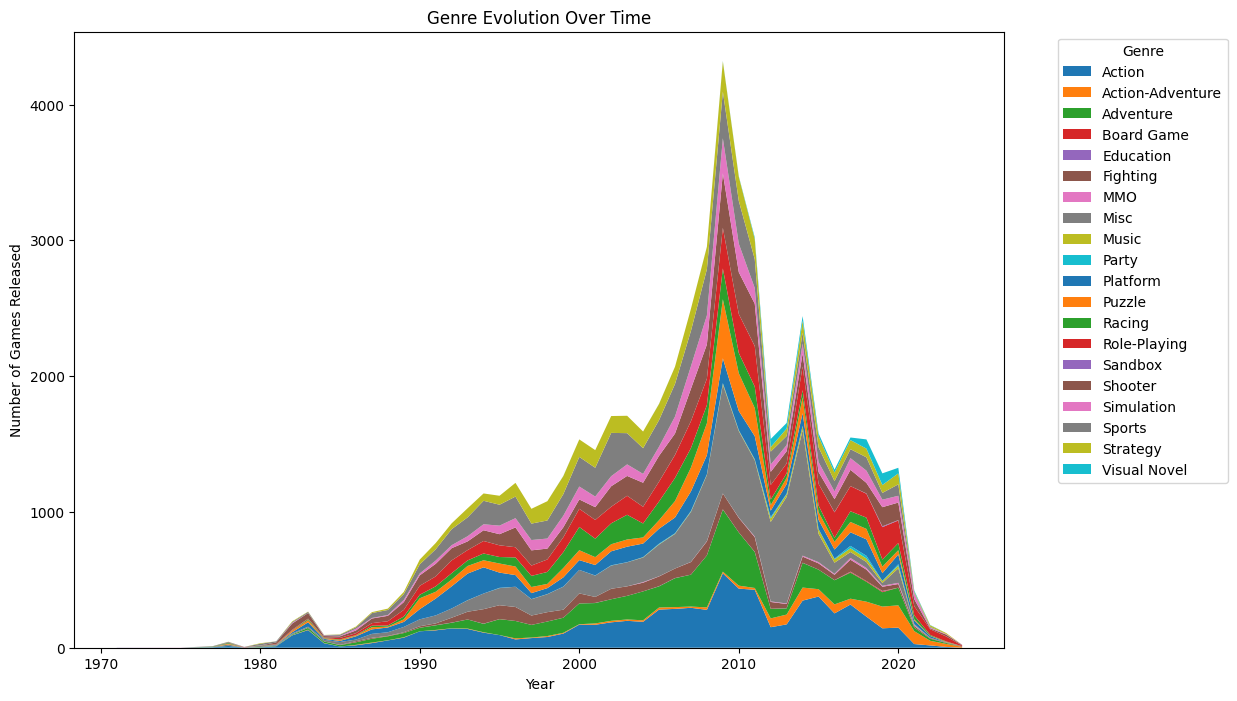

In [83]:
genre_evolution = df.groupby(['release_year', 'genre']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
plt.stackplot(genre_evolution.index, genre_evolution.T, labels=genre_evolution.columns)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Genre Evolution Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.show()


Q7 :  Seasonal Trends in Game Releases

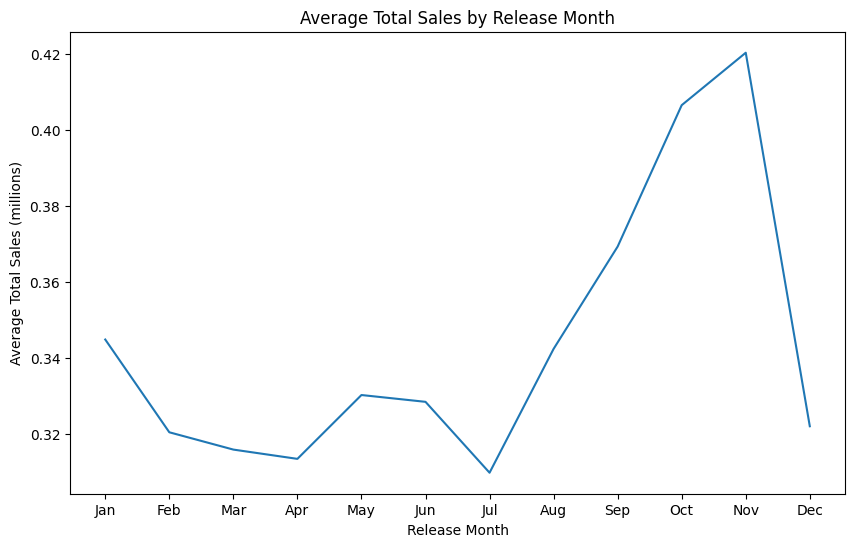

In [86]:
import seaborn as sns
df['release_month'] = df['release_date'].dt.month
monthly_sales = df.groupby('release_month')['total_sales'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Average Total Sales by Release Month")
plt.xlabel("Release Month")
plt.ylabel("Average Total Sales (millions)")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


# ***Dataset Used (With Link and Dimension Details):***
Dataset : Video game sales

https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024

dimensions:
(64016, 14)

#Details of the implementation
Python Libraries: List the libraries used, e.g., pandas, numpy, matplotlib, seaborn,plotly express

Prominent Functions:
Data Preprocessing: pd.read_csv, pd.dropna() , df.select_dtypes()
,pd.to_datetime()

Visualization: e.g., plt.plot(), sns.lineplot()


